In [11]:
import math
import cv2 as cv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [13]:
def LaneFiltering(lines):
    if lines is None:
        return None

    Lanes = []

    for i in range(0,len(lines)):
        l = lines[i][0]
        x1,y1,x2,y2=l[0],l[1],l[2],l[3]
        if x1 == x2:
            Lanes.append([x1,y1,x2,y2])
            continue
        angle=math.atan((y2-y1)/(x2-x1))*180/math.pi
        if abs(angle)>10:
            Lanes.append([x1,y1,x2,y2])

    return Lanes

In [14]:
def SearchLines(img):
    if img is None:
        return None

    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray=cv.GaussianBlur(gray,(7,7),0)
    edges=cv.Canny(gray,40,100)

    plt.imshow('edges',edges)

    lines=cv.HoughLinesP(edges,1,math.pi/180,threshold=80,lines=None,minLineLength=20,maxLineGap=20)

    edges=cv.cvtColor(edges,cv.COLOR_GRAY2BGR)
    if lines is not None:
        for i in range(0,len(lines)):
            l=lines[i][0]
            cv.line(edges,(l[0],l[1]),(l[2],l[3]),(255,0,255),3,cv.LINE_AA)

    plt.imshow('HoughLinesP', edges)

    return lines

In [15]:
def LaneRecognition():
    
    img = cv.imread('test.png')
    plt.imshow('img',img)

    lines = SearchLines(img)
    Lane = LaneFiltering(lines)
        
    if Lane is not None:
        for i in range(0, len(Lane)):
            cv.line(img, (Lane[i][0], Lane[i][1]), (Lane[i][2], Lane[i][3]), (0,255,0), 3, cv.LINE_AA) 
    
    plt.imshow('Lane',img)

    cv.waitKey(0)
    cv.destroyAllWindows()

ValueError: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8) is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

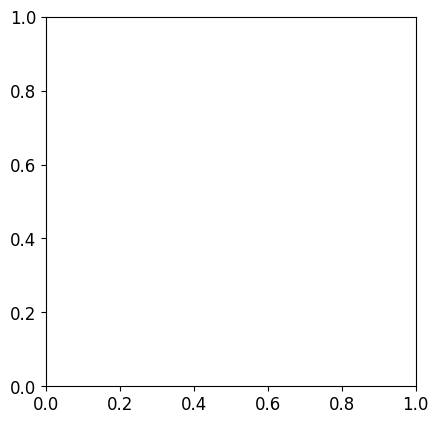

In [16]:
LaneRecognition()